In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# BTM

## Overview of data

In [14]:
input2 = np.load("input2.npy")

# read pv data
nl = pd.read_csv("netload.csv", header=None).to_numpy()
load = pd.read_csv("load.csv", header=None).to_numpy()
pv = pd.read_csv("pv.csv", header = None).to_numpy()

### Value

In [15]:
x = list(range(1, 169, 1))
periodL = load[0:168, 0]
periodNL = nl[0:168, 0]
periodPV = pv[0:168, 0]

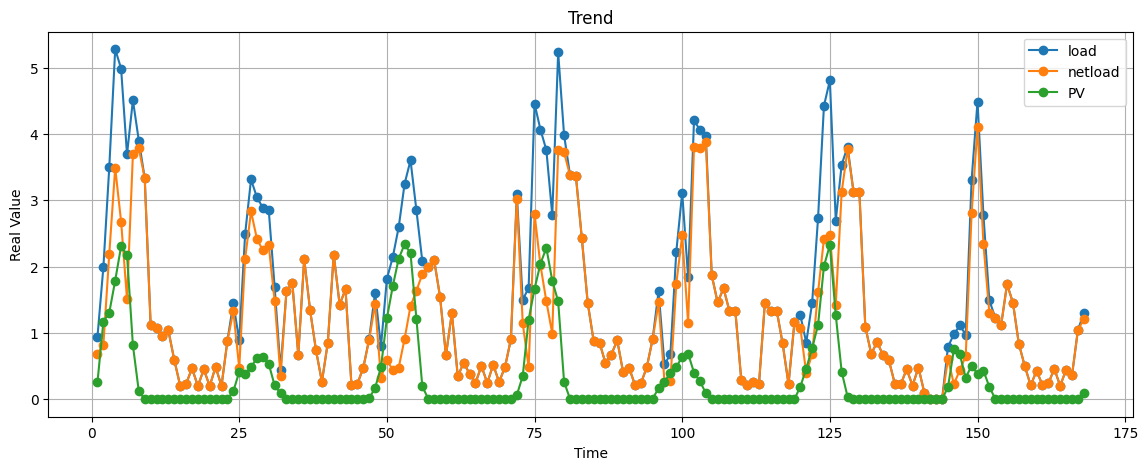

In [16]:
plt.figure(figsize=(14, 5))

# Plot the first array
plt.plot(x, periodL, label='load', marker='o')
plt.plot(x, periodNL, label='netload', marker='o')
plt.plot(x, periodPV, label='PV', marker='o')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Real Value')
plt.title('Trend')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### Correlation

In [11]:
# correlation
x2 = list(range(1, 301, 1))

temp_cor = []
dhi_cor = []
ghi_cor = [] 

for i in range(300):
    pv0 = pv[:, i]
    # temp
    temp0 = input2[:, i, 1]
    # dhi
    dhi0 = input2[:, i, 2]
    # ghi
    ghi0 = input2[:, i, 3]

    temp_cor.append(np.corrcoef(pv0, temp0)[0,1])
    dhi_cor.append(np.corrcoef(pv0, dhi0)[0,1])
    ghi_cor.append(np.corrcoef(pv0, ghi0)[0,1])

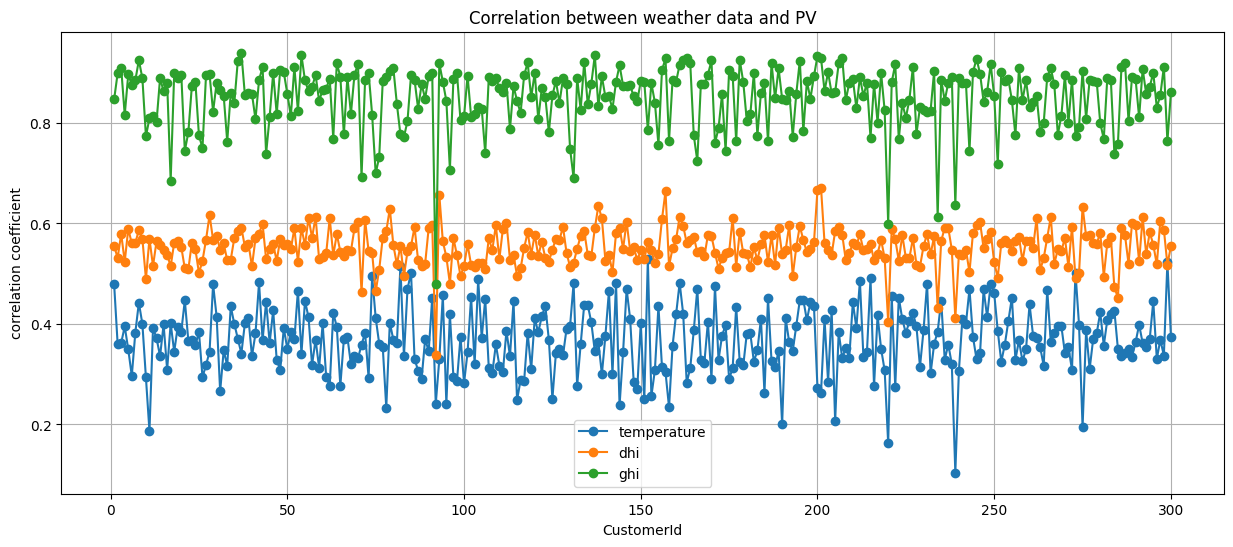

In [10]:
plt.figure(figsize=(15, 6))

# Plot the first array
plt.plot(x2, temp_cor, label='temperature', marker='o')
# Plot the second array
plt.plot(x2, dhi_cor, label='dhi', marker='o')
# Plot the second array
plt.plot(x2, ghi_cor, label='ghi', marker='o')

# Add labels and title
plt.xlabel('CustomerId')
plt.ylabel('correlation coefficient')
plt.title('Correlation between weather data and PV generation')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## Predict-Real Comparison

### no shuffle 

In [4]:
# Read predicted value and test value

# Load
predictL0 = np.load("../predict/predictL.npy")
predictL0H = np.load("../predict/predictLH.npy")
testL0 = np.load("../predict/testL.npy")

# PV
predictPV0 = np.load("../predict/predictPV.npy")
predictPV0H = np.load("../predict/predictPVH.npy")
testPV0 = np.load("../predict/testPV.npy")

In [5]:
testL =  np.zeros(168)
predictL = np.zeros(168)
predictLH = np.zeros(168)

testPV =  np.zeros(168)
predictPV = np.zeros(168)
predictPVH = np.zeros(168)

In [30]:
customerId = 100

for i in range(7):
    testL[i*24:(i+1)*24] = testL0[i, :, customerId]
    predictL[i*24:(i+1)*24] = predictL0[i, :, customerId]
    predictLH[i*24:(i+1)*24] = predictL0H[i, :, customerId]

    testPV[i*24:(i+1)*24] = testPV0[i, :, customerId]
    predictPV[i*24:(i+1)*24] = predictPV0[i, :, customerId]
    predictPVH[i*24:(i+1)*24] = predictPV0H[i, :, customerId]

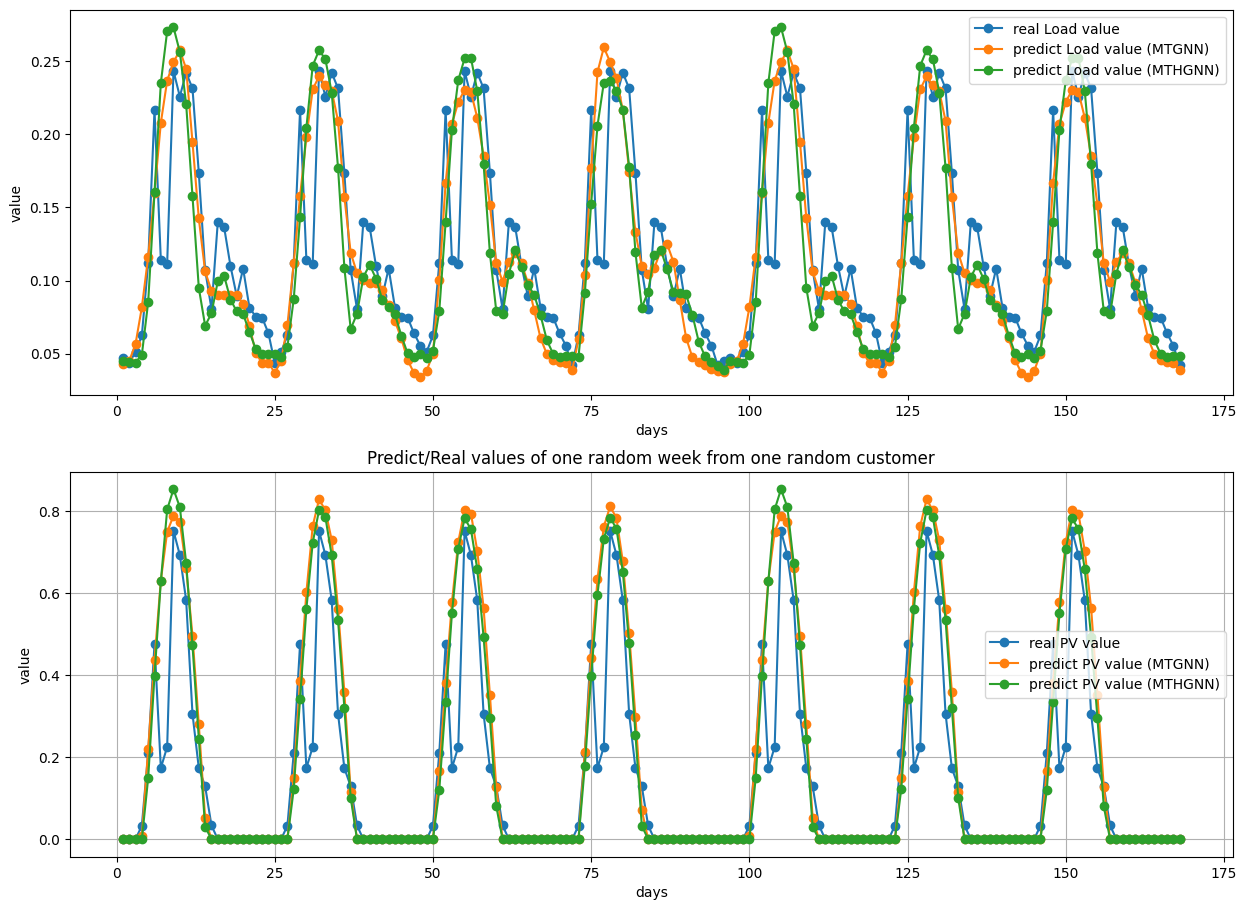

In [31]:
x = list(range(1,169,1))

fig, axs = plt.subplots(2)
fig.set_figheight(11)
fig.set_figwidth(15)

axs[0].plot(x, testL, label='real Load value', marker='o')
axs[0].plot(x, predictL, label='predict Load value (MTGNN)', marker='o')
axs[0].plot(x, predictLH, label='predict Load value (MTHGNN)', marker='o')


#axs[0].set_title('Load')
axs[0].set_xlabel('days')
axs[0].set_ylabel('value')

axs[1].plot(x, testPV, label='real PV value', marker='o')
axs[1].plot(x, predictPV, label='predict PV value (MTGNN)', marker='o')
axs[1].plot(x, predictPVH, label='predict PV value (MTHGNN)', marker='o')
#axs[1].set_title('PV')
axs[1].set_xlabel('days')
axs[1].set_ylabel('value')

# Add legend
axs[0].legend()
axs[1].legend()
plt.title('Predict/Real values of one random week from one random customer')
# Show the plot
plt.grid(True)
plt.show()

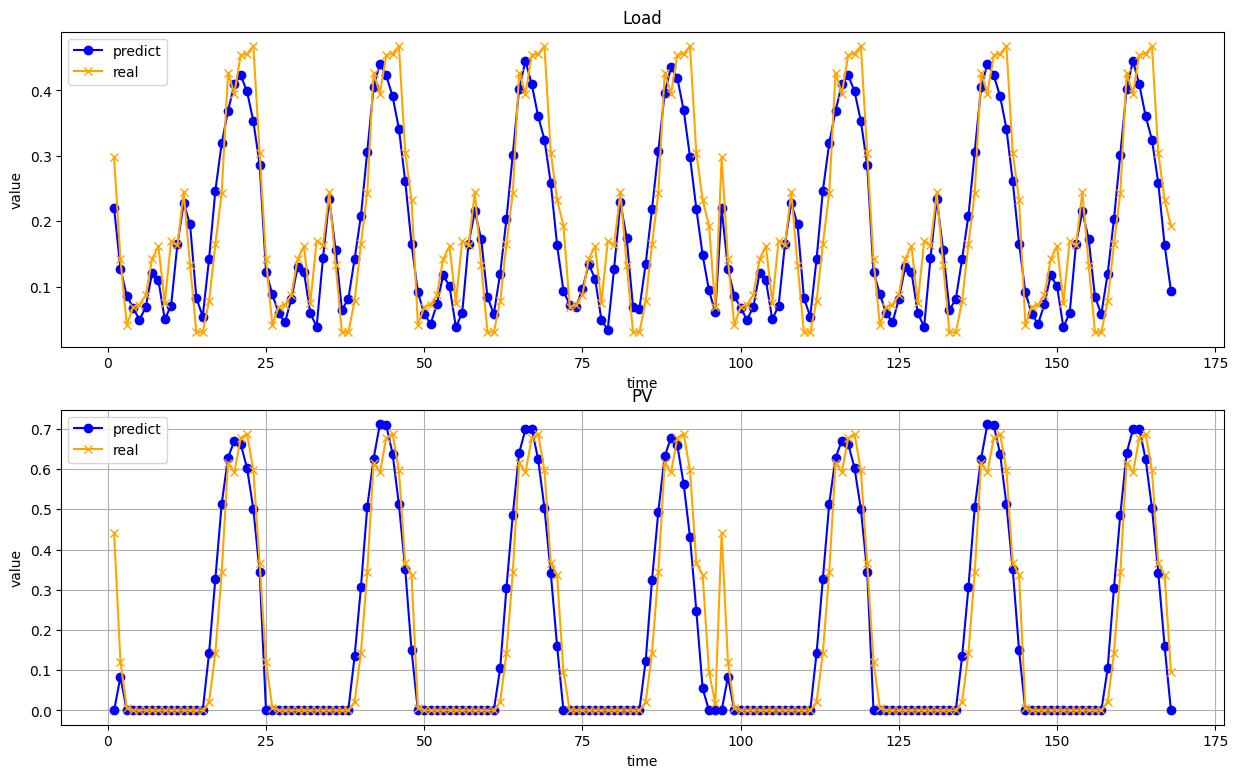

In [20]:
x = list(range(1,169,1))

fig, axs = plt.subplots(2)
fig.set_figheight(9)
fig.set_figwidth(15)


axs[0].plot(x, predictL, label='predict', marker='o', color='blue')
axs[0].plot(x, testL, label='real', marker='x', color='orange')
axs[0].set_title('Load')
axs[0].set_xlabel('time')
axs[0].set_ylabel('value')

axs[1].plot(x, predictPV, label='predict', marker='o', color='blue')
axs[1].plot(x, testPV, label='real', marker='x', color='orange')
axs[1].set_title('PV')
axs[1].set_xlabel('time')
axs[1].set_ylabel('value')

# Add legend
axs[0].legend()
axs[1].legend()

# Show the plot
plt.grid(True)
plt.show()

### output_len = 12

#### MTHGNN

In [218]:
# Load
predictL120 = np.load("../predict/btm/MTHGNN/predictLnoshuffle.npy")
testL120 = np.load("../predict/btm/MTHGNN/testLnoshuffle.npy.npy")

# PV
predictPV120 = np.load("../predict/btm/predictPV12.npy")
testPV120 = np.load("../predict/btm/testPV12.npy")

print(predictL120.shape)
print(predictPV120.shape)

(2624, 12, 300)
(2624, 12, 300)


In [15]:
testL12 =  np.zeros(168)
predictL12 = np.zeros(168)

testPV12 =  np.zeros(168)
predictPV12 = np.zeros(168)

In [16]:
customerId = 100
out_len = 12

for i in range(14):
    testL12[i*out_len:(i+1)*out_len]     = testL120[i, :, customerId]
    predictL12[i*out_len:(i+1)*out_len]  = predictL120[i, :, customerId]
    testPV12[i*out_len:(i+1)*out_len]    = testPV120[i, :, customerId]
    predictPV12[i*out_len:(i+1)*out_len] = predictPV120[i, :, customerId]

NameError: name 'testL120' is not defined

### output_len = 6

### output_len = 1

# Other Datasets

## Eletricity

In [186]:
# MTGNN
predictEle0 = np.load("../predict/others/testElectricity.npy")
# MTHGNN
predictEle0H = np.load("../predict/others/testElectricityH.npy")

testEle0 = np.load("../predict/others/predictElectricity.npy")

print(predictEle0.shape)

(5261, 321)


In [187]:
l = 168

# MTGNN
testEle = np.zeros(l)
# MTHGNN
predictEleH = np.zeros(l)
# test
predictEle = np.zeros(l)


customerId = 100
for i in range(l):
    testEle[i]     = testEle0[i, customerId]
    predictEle[i]  = predictEle0[i, customerId]
    predictEleH[i] = predictEle0H[i, customerId]

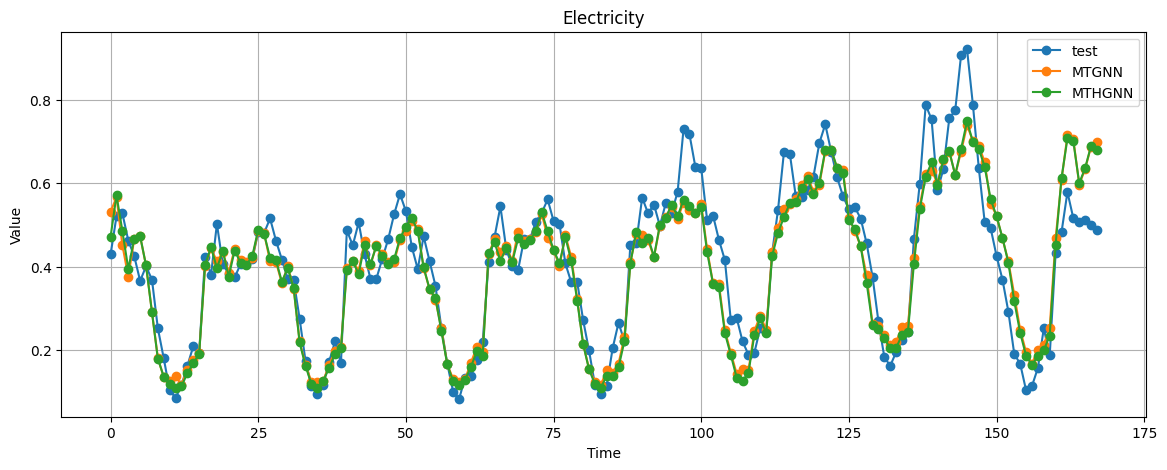

In [197]:
x = list(range(0, l, 1))

plt.figure(figsize=(14, 5))

# Plot the first array
plt.plot(x, testEle, label='test', marker='o')
plt.plot(x, predictEle, label='MTGNN', marker='o')
plt.plot(x, predictEleH, label='MTHGNN', marker='o')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Electricity')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## Exchange-rate

### Predict-Real Comparison

In [189]:
# MTGNN
predictER0 = np.load("../predict/others/testER.npy")
# MTHGNN
predictER0H = np.load("../predict/others/testERH.npy")

testER0 = np.load("../predict/others/predictER.npy")

In [194]:
l = 168

# MTGNN
predictER = np.zeros(l)
# MTHGNN
predictERH = np.zeros(l)

testER = np.zeros(l)

customerId = 1
for i in range(l):
    testER[i]     = testER0[i, customerId]
    predictER[i]  = predictER0[i, customerId]
    predictERH[i] = predictER0H[i, customerId]

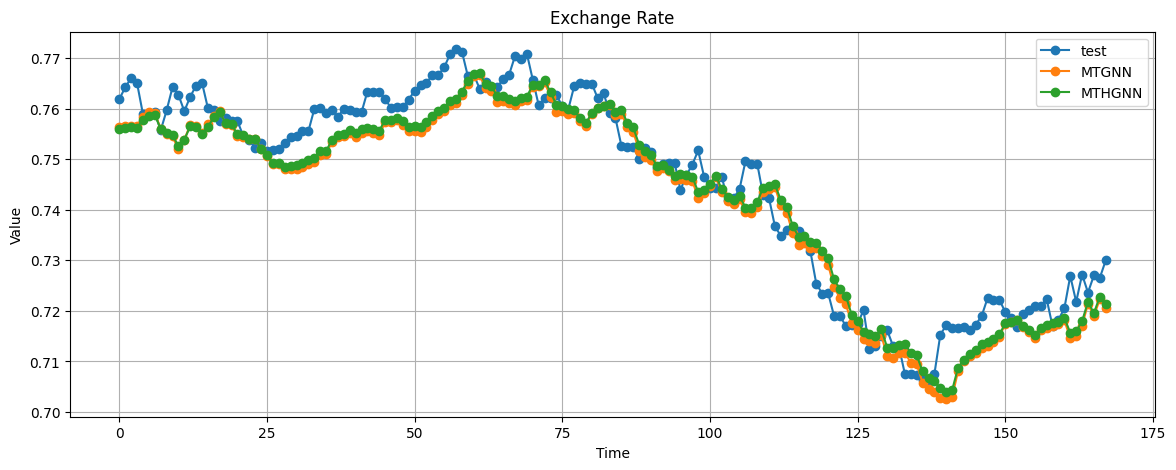

In [196]:
x = list(range(0, l, 1))

plt.figure(figsize=(14, 5))

# Plot the first array
plt.plot(x, testER, label='test', marker='o')
plt.plot(x, predictER, label='MTGNN', marker='o')
plt.plot(x, predictERH, label='MTHGNN', marker='o')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Exchange Rate')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
'''
x = list(range(0, l, 1))

figER, axsER = plt.subplots(2)
figER.set_figheight(10)
figER.set_figwidth(15)

axsER[0].plot(x, testER, label='test', marker='o', color='blue')
axsER[0].plot(x, predictER, label='predict', marker='x', color='orange')
axsER[0].set_title('MTGNN')
axsER[0].set_xlabel('time')

axsER[1].plot(x, testER, label='test', marker='o', color='blue')
axsER[1].plot(x, predictER, label='predict', marker='x', color='orange')
axsER[1].set_title('MTHGNN')
axsER[1].set_xlabel('time')

axsER[0].legend()
axsER[1].legend()

plt.grid(True)
plt.show()
'''

## Solar

In [5]:
# MTGNN
predictSolar = np.load("../predict/others/predictSolar.npy")
# MTHGNN
predictSolarH = np.load("../predict/others/predictSolarH.npy")

testSolar= np.load("../predict/others/testSolar.npy")

In [10]:
l = 168

# MTGNN
predict = np.zeros(l)
# MTHGNN
predicth = np.zeros(l)

test = np.zeros(l)

customerId = 2
for i in range(l):
    test[i]     = testSolar[i, customerId]
    predict[i]  = predictSolar[i, customerId]
    predicth[i] = predictSolarH[i, customerId]

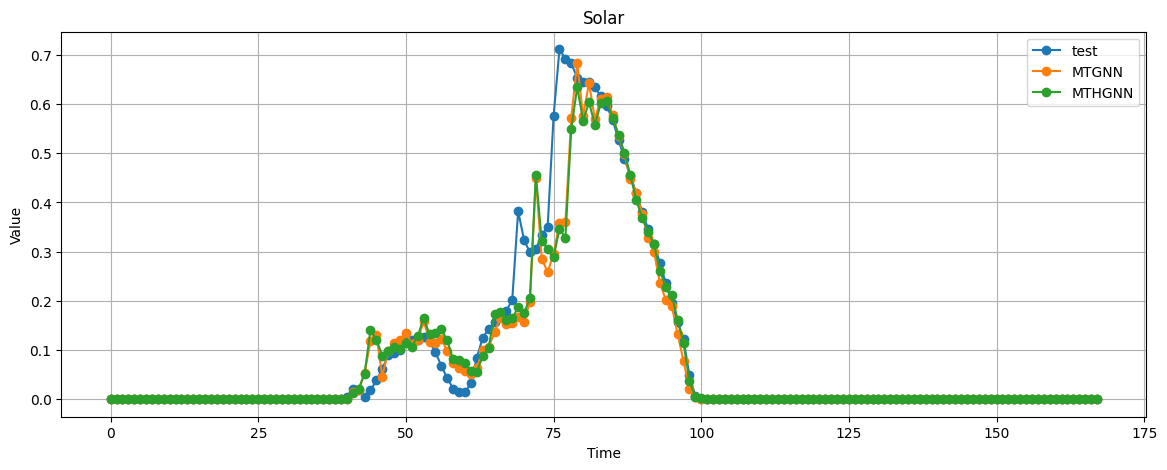

In [11]:
x = list(range(0, l, 1))

plt.figure(figsize=(14, 5))

# Plot the first array
plt.plot(x, test, label='test', marker='o')
plt.plot(x, predict, label='MTGNN', marker='o')
plt.plot(x, predicth, label='MTHGNN', marker='o')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Solar')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [2]:
import numpy as np

In [6]:
# Hyper 50


np.mean([0.0811, 0.0812, 0.0810, 0.0805, 0.0839])
np.std([0.0811, 0.0812, 0.0810, 0.0805, 0.0839])


print(np.mean([0.0485, 0.0487, 0.0491, 0.0484, 0.0492]))
print(np.std([0.0485, 0.0487, 0.0491, 0.0484, 0.0492]))

print(np.mean([0.9159, 0.9171, 0.9167, 0.9152, 0.9174]))
print(np.std([0.9159, 0.9171, 0.9167, 0.9152, 0.9174]))

0.048780000000000004
0.00031874754901018435


In [8]:
# Hyper 40

print(np.mean([0.0805, 0.0801, 0.0821, 0.0819, 0.0792]))
print(np.std([0.0805, 0.0801, 0.0821, 0.0819, 0.0792]))

print(np.mean([0.0484, 0.0479, 0.0495, 0.0487, 0.0475]))
print(np.std([0.0484, 0.0479, 0.0495, 0.0487, 0.0475]))

print(np.mean([0.9162,0.9165,0.9144,0.9172, 0.9176]))
print(np.std([0.9162,0.9165,0.9144,0.9172, 0.9176]))

0.08076
0.0010983624174196777
0.0484
0.0006870225614927076
0.91638
0.0011070682002478423


In [11]:
# Hyper 30
print(np.mean([0.0809,0.0811,0.0799,0.0825,0.0813]))
print(np.std([0.0809,0.0811,0.0799,0.0825,0.0813]))

print(np.mean([0.0484, 0.0483, 0.0483, 0.0488, 0.0490]))
print(np.std([0.0484, 0.0483, 0.0483, 0.0488, 0.0490]))

print(np.mean([0.9174, 0.9171, 0.9152, 0.9158, 0.9172]))
print(np.std([0.9174, 0.9171, 0.9152, 0.9158, 0.9172]))

0.08114
0.0008333066662399879
0.048560000000000006
0.0002870540018881468
0.91654
0.0008754427451295806


In [12]:
# Hyper 20
print(np.mean([0.0815, 0.0808, 0.0811, 0.0814, 0.0815]))
print(np.std([0.0815, 0.0808, 0.0811, 0.0814, 0.0815]))

print(np.mean([0.0482, 0.0480, 0.0482, 0.0493, 0.0485]))
print(np.std([0.0482, 0.0480, 0.0482, 0.0493, 0.0485]))

print(np.mean([ 0.9167, 0.9162, 0.9162, 0.9172, 0.9166]))
print(np.std([ 0.9167, 0.9162, 0.9162, 0.9172, 0.9166]))

0.08126
0.0002727636339397186
0.04844
0.0004586937976471872
0.91658
0.00037094473981982444


In [13]:
# Hyper 10
print(np.mean([0.0837, 0.0804, 0.0821, 0.0819, 0.0840]))
print(np.std([0.0837, 0.0804, 0.0821, 0.0819, 0.0840]))

print(np.mean([0.0496, 0.0480, 0.0493, 0.0483, 0.0507]))
print(np.std([0.0496, 0.0480, 0.0493, 0.0483, 0.0507]))

print(np.mean([0.9152, 0.9172, 0.9148, 0.9170, 0.9156]))
print(np.std([0.9152, 0.9172, 0.9148, 0.9170, 0.9156]))

0.08242000000000001
0.0013105723940324706
0.049179999999999995
0.0009662297863344926
0.9159600000000001
0.0009666436778875907
